<a href="https://colab.research.google.com/github/deepanshu-j/mnist_number_prediction/blob/main/L_layer_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L-Layer Deep Fully Connected Neural Network
### Digit Prediction - *MNIST Dataset*
#### *From Scratch Using Numpy*
##### (Using Batch Gradient Descent)
*   Training the Model on Training set
*   Getting the Accuracy on the Test set
*   Tuning the Hyperparameters( learning_rate and alpha0 in this case) 
*   Getting the Accuracy on the Test set again 
*   Comparing the Accuracy for different Learning rates 







In [ ]:
# Load Libraries
import numpy as np
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

### Defining the Model with single neuron in the Output Layer
And Testing them on dumb input to verify

Input follows 
f(x,y,z) = x

3 input variables, single output

In [123]:
training_inputs = np.array(
    [[1,1,0],
     [1,0,1],
     [0,1,1],
     [0,1,0]])


training_inputs = training_inputs.T

print(training_inputs.shape)
training_outputs = np.array([[1,1,0,0]])
print(training_outputs.shape)


# Training input shape = (n_x, m) n_x=3 , m=4   => (3,4)
# Training outputs shape = (1, m)    

np.random.seed(1)

# Helper Functions
def sigmoid(x):
  return 1/ (1+np.exp(-x))

def relu(x):
  # return np.maximum(x, 0)
  return np.tanh(x)

# DEFINING PARAMTERS weights and bais and n_x, n_h, n_y

X = training_inputs
Y = training_outputs

n_x, n_y = X.shape[0], Y.shape[0]   
m = X.shape[1]

layer_dims = [n_x, 5, 4, n_y]
L = len(layer_dims) # It does not represents L as its value is L+1 where L is L- deep nn
print('L: ',L)
# n_h = L-1

learning_rate = 0.5 
num_iterations = 5000

# weights matrix 
# shape (n_h, n_x)
# W1 = np.random.rand(n_h, n_x) * 0.01
# b1 = np.zeros(shape=(n_h, 1)) 
# W2 = np.random.rand(n_y, n_h) * 0.01
# b2 = np.zeros(shape=(n_y, 1)) 

parameters = {}

for l in range(1,L):
  parameters["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
  parameters["b"+str(l)] = np.zeros(shape=(layer_dims[l],1))

# print('parameters:\n',parameters)

costs = [] # We will this array for ploting cost fn


# Batch Gradient Descent 
for num_iteration in range(num_iterations):
  
  # Forward Prop
  # Z1 = np.dot(W1, X) + b1  # X = A0  shape = n_h,n_x . n_x,m => (n_h,m)
  # A1 = np.tanh(Z1)
  # Z2 = np.dot(W2, A1) + b2
  # A2 = sigmoid(Z2)
  cache = {}
  cache['A0'] = X

  for l in range(1,L): # 1->L-2  relu
    W_l = parameters['W'+str(l)]
    b_l = parameters['b'+str(l)]
    A_prev = X if l==1 else cache['A'+str(l-1)]
    # if l==1:
    #   A_prev = X
    # else:
    #   A_prev = cache['A'+str(l-1)]

    Z_l = np.dot(W_l, A_prev) + b_l 

    A_l = sigmoid(Z_l) if l==L-1 else relu(Z_l)

    cache['Z'+str(l)] = Z_l
    cache['A'+str(l)] = A_l 
  # Store these activations for later use
  # cache = {
  #     "Z1": Z1,
  #     "A1": A1,
  #     "Z2": Z2,
  #     "A2": A2
  # }
  # print('cache:\n',cache)
  
  # Compute Cost
  cost = (-1/m) * np.sum( np.multiply(Y, np.log( cache['A'+str(L-1)] )) + np.multiply(1 - Y, np.log(1 -  cache['A'+str(L-1)] )) )

  # Backward Prop 
  
  # dZ2 = A2 - Y
  # assert(dZ2.shape == (n_y,m))
  # dW2 = (1/m) * np.dot(dZ2,A1.T)
  # # n_y,m . m,n_h  => n_y,n_h

  # db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) # (n_y,1)

  # dA1 = np.dot(W2.T,dZ2)   # n_h,n_y . n_y,m => n_h,m 
  # assert(dA1.shape == (n_h,m))
  # dZ1 = dA1 * (1- np.power(A1, 2))
  # assert(dZ1.shape==(n_h,m))
  # dW1 = (1/m) * np.dot(dZ1,X.T) # n_h,m  . m,n_x
  # assert(dW1.shape==(n_h,n_x))

  # db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  #(n_h,1)

  grads = {}

  for l in range(L-1,0,-1):
    # print('on: ',l, "th layer")
    if l==L-1: 
      # print(l,' sigmoid')
      dZ_l = cache['A'+str(l)] - Y
      dW_l = (1/m) * np.dot(dZ_l, cache['A'+str(l-1)].T)
      db_l = (1/m) * np.sum(dZ_l, axis=1, keepdims=True) # (n_y,1)
      grads['dZ'+str(l)] = dZ_l
      grads['dW'+str(l)] = dW_l
      grads['db'+str(l)] = db_l
    else:
      # print(l,' relu')
      dA_l = np.dot(parameters['W'+str(l+1)].T,grads['dZ'+str(l+1)])
      dZ_l = dA_l * (1- np.power(cache['A'+str(l)], 2))  ## ReLU Derivative Here ##
      dW_l = (1/m) * np.dot(dZ_l,cache['A'+str(l-1)].T) # n_h,m  . m,n_x
      db_l = (1/m) * np.sum(dZ_l, axis=1, keepdims=True)
      grads['dA'+str(l)] = dA_l
      grads['dZ'+str(l)] = dZ_l
      grads['dW'+str(l)] = dW_l
      grads['db'+str(l)] = db_l
  
  # print('grads:\n', grads)
#   # store gradients 
#   grads = {"dW1": dW1,
#            "db1": db1,
#            "dW2": dW2,
#            "db2": db2}

  # Gradient Descent
  # W1 = W1 - learning_rate * dW1
  # b1 = b1 - learning_rate * db1
  # W2 = W2 - learning_rate * dW2
  # b2 = b2 - learning_rate * db2

  for l in range(1,L):
    # print('updating for: ', l, "th layer")
    parameters['W'+str(l)] = parameters['W'+str(l)] - learning_rate * grads['dW'+str(l)]
  if num_iteration%1000==0:
    costs.append(cost)
    print('Cost after {} iterations: {}'.format(num_iteration,cost))

# ***********Model End Here*************#

# Helpers 
def beautify(x):
  return 1 if x > 0.5 else 0
def predict(test_input):
  # Forward Prop
  cache = {}
  for l in range(1,L): # 1->L-2  relu
    W_l = parameters['W'+str(l)]
    b_l = parameters['b'+str(l)]
    A_prev = test_input if l==1 else cache['A'+str(l-1)]
    # if l==1:
    #   A_prev = X
    # else:
    #   A_prev = cache['A'+str(l-1)]

    Z_l = np.dot(W_l, A_prev) + b_l 

    A_l = sigmoid(Z_l) if l==L-1 else relu(Z_l)
    cache['Z'+str(l)] = Z_l
    cache['A'+str(l)] = A_l 
  print(cache['A'+str(L-1)])
  result =  np.vectorize(beautify)(A_l)
  print(result)
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()


(3, 4)
(1, 4)
L:  4
Cost after 0 iterations: 1.1061574510472774
Cost after 1000 iterations: 0.0004902150977053695
Cost after 2000 iterations: 0.00024614030234988303
Cost after 3000 iterations: 0.00016443351136150586
Cost after 4000 iterations: 0.00012348606796947143


[[9.99366879e-01 9.99929939e-01 1.19931510e-02 5.00000000e-01
  1.01361821e-04 8.14962923e-05 4.80153870e-04 1.58908425e-04]]
[[1 1 0 0 0 0 0 0]]


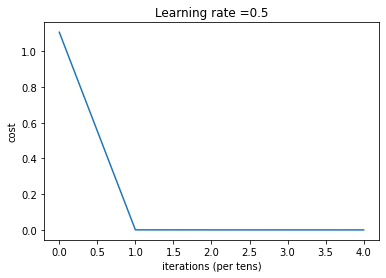

In [124]:
test_input = np.array(
    [[1,1,1],
     [1,0,0],
     [0,0,1],
     [0,0,0],
     [0,1,0],
     [0,5,6],
     [1,2,2],
     [1,3,1]
     ])
predict(test_input.T)



# **Digit Prediction Model**

#### Understanding the Data (and it's shape) 

In [126]:
# load Dataset
mnist = load_digits()
print(mnist.keys())
#pd.DataFrame(mnist)

print(type(mnist.data))
print(type(mnist.images))


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [127]:
print(pd.DataFrame(mnist.data).head())
print(mnist.data.shape)
print(mnist.target.shape)
print(mnist.images.shape)

    0    1    2     3     4     5    6   ...   57   58    59    60    61   62   63
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  ...  0.0  6.0  13.0  10.0   0.0  0.0  0.0
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  ...  0.0  0.0  11.0  16.0  10.0  0.0  0.0
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  ...  0.0  0.0   3.0  11.0  16.0  9.0  0.0
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  ...  0.0  7.0  13.0  13.0   9.0  0.0  0.0
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  ...  0.0  0.0   2.0  16.0   4.0  0.0  0.0

[5 rows x 64 columns]
(1797, 64)
(1797,)
(1797, 8, 8)


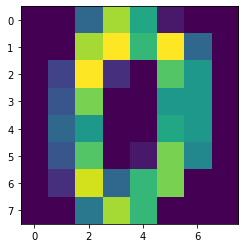

In [128]:
mnist.data[0]

plt.imshow(np.reshape(mnist.data[0],(8,8)))

# plt.imshow(mnist.images[0])

In [134]:
X = mnist.data
y = (mnist.target)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(y_train))
print(y_train)
# y_train = y_train.reshape(y_train.shape[0],1)
# print(y_train)

(1203, 64)
(594, 64)
(1203,)
(594,)
<class 'numpy.ndarray'>
[1 1 8 ... 2 7 1]


# *Helper Functions*

In [135]:

np.random.seed(1)

def sigmoid(x):
  return 1/ (1+np.exp(-x))

def relu(x):
  # return np.maximum(x, 0)
  return np.tanh(x)

def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum(axis=0)



### Softmax Function 

In [136]:

def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum(axis=0)

## **One Hot Encoding for y_train matrix**


In [137]:
from sklearn.preprocessing import OneHotEncoder

integer_encoded = y_train

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
print(onehot_encoded.shape)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(1203, 10)


# Defining and Initializing Parameters and Hyperparameters
*   weights
*   bias
*   learning_rate
*   decay_rate and initial_learing_rate(lr0)
*   L (Number of Layers in the NN)
*   num_iterations - Number of Iterations
*   layer_dims (Array defining Neurons in each hidden Layer)





In [180]:
# training_inputs = np.array(
#     [[1,1,0],
#      [1,0,1],
#      [0,1,1],
#      [0,1,0]])


# training_inputs = training_inputs.T
training_inputs  = X_train.T

print(training_inputs.shape)
# training_outputs = np.array([[0,0,1,1],[1,1,0,0],[0,0,0,0]])
training_outputs = onehot_encoded.T

print(training_outputs.shape)

# Training input shape = (n_x, m) n_x=3 , m=4   => (3,4)
# Training outputs shape = (n_y, m)    

# DEFINING PARAMTERS weights and bais and n_x, n_h, n_y

X = training_inputs
Y = training_outputs

n_x, n_y = X.shape[0], Y.shape[0]   
m = X.shape[1]

layer_dims = [n_x, 5, 4, n_y]
L = len(layer_dims) # It does not represents L as its value is L+1 where L is L- deep nn
print('L: ',L)
# n_h = L-1

# Hyperparameters for Learning Decay 
learning_rate = 0.15 # Gave 90. % accuracy
lr0 = 1
decay_rate = 1

num_iterations = 20000

# weights matrix 
# shape (n_h, n_x)
# W1 = np.random.rand(n_h, n_x) * 0.01
# b1 = np.zeros(shape=(n_h, 1)) 
# W2 = np.random.rand(n_y, n_h) * 0.01
# b2 = np.zeros(shape=(n_y, 1)) 

parameters = {}

for l in range(1,L):
  parameters["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
  parameters["b"+str(l)] = np.zeros(shape=(layer_dims[l],1))

# print('parameters:\n',parameters)

costs = [] # We will use this List to plot cost fn


(64, 1203)
(10, 1203)
L:  4


### Batch Gradient Descent 

UnModified Version

In [181]:

for num_iteration in range(num_iterations):
  
  # Forward Prop
  # Z1 = np.dot(W1, X) + b1  # X = A0  shape = n_h,n_x . n_x,m => (n_h,m)
  # A1 = np.tanh(Z1)
  # Z2 = np.dot(W2, A1) + b2
  # A2 = sigmoid(Z2)
  cache = {}
  cache['A0'] = X

  for l in range(1,L): # 1->L-2  relu
    W_l = parameters['W'+str(l)]
    b_l = parameters['b'+str(l)]
    A_prev = X if l==1 else cache['A'+str(l-1)]
    # if l==1:
    #   A_prev = X
    # else:
    #   A_prev = cache['A'+str(l-1)]

    Z_l = np.dot(W_l, A_prev) + b_l 

    # A_l = sigmoid(Z_l) if l==L-1 else relu(Z_l)
    A_l = softmax(Z_l) if l==L-1 else relu(Z_l)


    cache['Z'+str(l)] = Z_l
    cache['A'+str(l)] = A_l 
  # # Using softmax on the last activation layer
  # cache['A' + str(L-1)] = softmax(cache['A' + str(L-1)])
  # Store these activations for later use
  # cache = {
  #     "Z1": Z1,
  #     "A1": A1,
  #     "Z2": Z2,
  #     "A2": A2
  # }
  # print('cache:\n',cache)
  
  # Compute Cost
  # cost = (-1/m) * np.sum( np.multiply(Y, np.log( cache['A'+str(L-1)] )) + np.multiply(1 - Y, np.log(1 -  cache['A'+str(L-1)] )) )
  cost = (-1/m) * np.sum( np.sum (np.multiply(Y, np.log( cache['A'+str(L-1)] ))) ) 

  # Using softmax on the last activation layer
  # cache['A' + str(L-1)] = softmax(cache['A' + str(L-1)])

  # Backward Prop 
  
  # dZ2 = A2 - Y
  # assert(dZ2.shape == (n_y,m))
  # dW2 = (1/m) * np.dot(dZ2,A1.T)
  # # n_y,m . m,n_h  => n_y,n_h

  # db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) # (n_y,1)

  # dA1 = np.dot(W2.T,dZ2)   # n_h,n_y . n_y,m => n_h,m 
  # assert(dA1.shape == (n_h,m))
  # dZ1 = dA1 * (1- np.power(A1, 2))
  # assert(dZ1.shape==(n_h,m))
  # dW1 = (1/m) * np.dot(dZ1,X.T) # n_h,m  . m,n_x
  # assert(dW1.shape==(n_h,n_x))

  # db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  #(n_h,1)

  grads = {}

  for l in range(L-1,0,-1):
    # print('on: ',l, "th layer")
    if l==L-1: 
      # print(l,' sigmoid')
      dZ_l = cache['A'+str(l)] - Y
      dW_l = (1/m) * np.dot(dZ_l, cache['A'+str(l-1)].T)
      db_l = (1/m) * np.sum(dZ_l, axis=1, keepdims=True) # (n_y,1)
      grads['dZ'+str(l)] = dZ_l
      grads['dW'+str(l)] = dW_l
      grads['db'+str(l)] = db_l
    else:
      # print(l,' relu')
      dA_l = np.dot(parameters['W'+str(l+1)].T,grads['dZ'+str(l+1)])
      dZ_l = dA_l * (1- np.power(cache['A'+str(l)], 2))  ## ReLU Derivative Here ##
      dW_l = (1/m) * np.dot(dZ_l,cache['A'+str(l-1)].T) # n_h,m  . m,n_x
      db_l = (1/m) * np.sum(dZ_l, axis=1, keepdims=True)
      grads['dA'+str(l)] = dA_l
      grads['dZ'+str(l)] = dZ_l
      grads['dW'+str(l)] = dW_l
      grads['db'+str(l)] = db_l
  
  # print('grads:\n', grads)
#   # store gradients 
#   grads = {"dW1": dW1,
#            "db1": db1,
#            "dW2": dW2,
#            "db2": db2}

  # Gradient Descent
  # W1 = W1 - learning_rate * dW1
  # b1 = b1 - learning_rate * db1
  # W2 = W2 - learning_rate * dW2
  # b2 = b2 - learning_rate * db2

  # lr = lr0 * (1. / (1. + decay_rate * num_iteration))
  # lr = learning_rate+0.01 if num_iteration>7500 else learning_rate
  lr = learning_rate
  for l in range(1,L):
    # print('updating for: ', l, "th layer")
    parameters['W'+str(l)] = parameters['W'+str(l)] - lr * grads['dW'+str(l)]
  if num_iteration%1000==0:
    costs.append(cost)
    print('Cost after {} iterations: {}'.format(num_iteration,cost))
    # print(f"Cost after {num_iteration} iterations: {cost}")

plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
# *************Model End Here************* #

# Helpers 
def beautify(x):
  return 1 if x > 0.5 else 0
def predict(test_input):
  # Forward Prop
  # print('weights after Training:\n', parameters['W'+str(L-1)])
  cache = {}
  for l in range(1,L): # 1->L-2  relu
    W_l = parameters['W'+str(l)]
    b_l = parameters['b'+str(l)]
    A_prev = test_input if l==1 else cache['A'+str(l-1)]
    # if l==1:
    #   A_prev = X
    # else:
    #   A_prev = cache['A'+str(l-1)]

    Z_l = np.dot(W_l, A_prev) + b_l 

    A_l = sigmoid(Z_l) if l==L-1 else relu(Z_l)
    cache['Z'+str(l)] = Z_l
    cache['A'+str(l)] = A_l 
  # print(cache['A'+str(L-1)])
  result =  np.vectorize(beautify)(A_l)
  print(result)
  print(result.shape)



## Batch Gradient Descent Model

In [182]:
def ff__nn(): # All the Parameters are Globally Declared  
  for num_iteration in range(num_iterations):
    
    # Forward Prop
    # Z1 = np.dot(W1, X) + b1  # X = A0  shape = n_h,n_x . n_x,m => (n_h,m)
    # A1 = np.tanh(Z1)
    # Z2 = np.dot(W2, A1) + b2
    # A2 = sigmoid(Z2)
    cache = {}
    cache['A0'] = X

    for l in range(1,L): # 1->L-2  relu
      W_l = parameters['W'+str(l)]
      b_l = parameters['b'+str(l)]
      A_prev = X if l==1 else cache['A'+str(l-1)]
      # if l==1:
      #   A_prev = X
      # else:
      #   A_prev = cache['A'+str(l-1)]

      Z_l = np.dot(W_l, A_prev) + b_l 

      # A_l = sigmoid(Z_l) if l==L-1 else relu(Z_l)
      A_l = softmax(Z_l) if l==L-1 else relu(Z_l)


      cache['Z'+str(l)] = Z_l
      cache['A'+str(l)] = A_l 
    # # Using softmax on the last activation layer
    # cache['A' + str(L-1)] = softmax(cache['A' + str(L-1)])
    # Store these activations for later use
    # cache = {
    #     "Z1": Z1,
    #     "A1": A1,
    #     "Z2": Z2,
    #     "A2": A2
    # }
    # print('cache:\n',cache)
    
    # Compute Cost
    # cost = (-1/m) * np.sum( np.multiply(Y, np.log( cache['A'+str(L-1)] )) + np.multiply(1 - Y, np.log(1 -  cache['A'+str(L-1)] )) )
    cost = (-1/m) * np.sum( np.sum (np.multiply(Y, np.log( cache['A'+str(L-1)] ))) ) 

    # Using softmax on the last activation layer
    # cache['A' + str(L-1)] = softmax(cache['A' + str(L-1)])

    # Backward Prop 
    
    # dZ2 = A2 - Y
    # assert(dZ2.shape == (n_y,m))
    # dW2 = (1/m) * np.dot(dZ2,A1.T)
    # # n_y,m . m,n_h  => n_y,n_h

    # db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) # (n_y,1)

    # dA1 = np.dot(W2.T,dZ2)   # n_h,n_y . n_y,m => n_h,m 
    # assert(dA1.shape == (n_h,m))
    # dZ1 = dA1 * (1- np.power(A1, 2))
    # assert(dZ1.shape==(n_h,m))
    # dW1 = (1/m) * np.dot(dZ1,X.T) # n_h,m  . m,n_x
    # assert(dW1.shape==(n_h,n_x))

    # db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  #(n_h,1)

    grads = {}

    for l in range(L-1,0,-1):
      # print('on: ',l, "th layer")
      if l==L-1: 
        # print(l,' sigmoid')
        dZ_l = cache['A'+str(l)] - Y
        dW_l = (1/m) * np.dot(dZ_l, cache['A'+str(l-1)].T)
        db_l = (1/m) * np.sum(dZ_l, axis=1, keepdims=True) # (n_y,1)
        grads['dZ'+str(l)] = dZ_l
        grads['dW'+str(l)] = dW_l
        grads['db'+str(l)] = db_l
      else:
        # print(l,' relu')
        dA_l = np.dot(parameters['W'+str(l+1)].T,grads['dZ'+str(l+1)])
        dZ_l = dA_l * (1- np.power(cache['A'+str(l)], 2))  ## ReLU Derivative Here ##
        dW_l = (1/m) * np.dot(dZ_l,cache['A'+str(l-1)].T) # n_h,m  . m,n_x
        db_l = (1/m) * np.sum(dZ_l, axis=1, keepdims=True)
        grads['dA'+str(l)] = dA_l
        grads['dZ'+str(l)] = dZ_l
        grads['dW'+str(l)] = dW_l
        grads['db'+str(l)] = db_l
    
    # print('grads:\n', grads)
  #   # store gradients 
  #   grads = {"dW1": dW1,
  #            "db1": db1,
  #            "dW2": dW2,
  #            "db2": db2}

    # Gradient Descent
    # W1 = W1 - learning_rate * dW1
    # b1 = b1 - learning_rate * db1
    # W2 = W2 - learning_rate * dW2
    # b2 = b2 - learning_rate * db2

    # lr = lr0 * (1. / (1. + decay_rate * num_iteration))
    # lr = learning_rate+0.01 if num_iteration>7500 else learning_rate
    lr = learning_rate
    for l in range(1,L):
      # print('updating for: ', l, "th layer")
      parameters['W'+str(l)] = parameters['W'+str(l)] - lr * grads['dW'+str(l)]
    if num_iteration%1000==0:
      costs.append(cost)
      print('Cost after {} iterations: {}'.format(num_iteration,cost))
      # print(f"Cost after {num_iteration} iterations: {cost}")
  # *************Model Ends Here************* #
  


## Helpers for computing prediction and Accuracy

In [183]:

def spit_result(x):
  # x = x.T
  res = []
  for i in range(x.shape[0]):
    res.append(np.argmax(x[i]))
  return np.array(res)

def compute_accuracy(x, y_test):
  # print(f"result.shape : {x.shape}")
  # print(f"y_test.shape : {y_test.shape}")
  assert(x.shape==y_test.shape)
  correct = 0
  total = x.shape[0]
  for i in range(x.shape[0]):
    if x[i]==y_test[i]:
      correct+=1
  return correct*100/total

def show_image_and_prediction(i, result):
  plt.imshow(np.reshape(X_test[i],(8,8)))
  plt.show()
  print(f"Model's prediction: {result[i]}\n")

def beautify(x):
  return 1 if x > 0.5 else 0

def predict(test_input, show_eg=False):
  # Forward Prop
  # print('weights after Training:\n', parameters['W'+str(L-1)])
  cache = {}
  for l in range(1,L): # 1->L-2  relu
    W_l = parameters['W'+str(l)]
    b_l = parameters['b'+str(l)]
    A_prev = test_input if l==1 else cache['A'+str(l-1)]
    # if l==1:
    #   A_prev = X
    # else:
    #   A_prev = cache['A'+str(l-1)]

    Z_l = np.dot(W_l, A_prev) + b_l 

    A_l = sigmoid(Z_l) if l==L-1 else relu(Z_l)
    cache['Z'+str(l)] = Z_l
    cache['A'+str(l)] = A_l 
  # print(cache['A'+str(L-1)])
  result =  spit_result(A_l.T) # np.vectorize(beautify)(A_l)
  # print(np.argmax(result.T))
  # print(np.argmax(result.T[0]))
  # print(result)
  print(f"\n\nAccuracy : {compute_accuracy(result,y_test)}% \n\n")
  if show_eg==True:
    for idx in range(3): 
      show_image_and_prediction(idx, result)

Cost after 0 iterations: 2.302583993811122
Cost after 1000 iterations: 0.9768952428940243
Cost after 2000 iterations: 0.6856083847610951
Cost after 3000 iterations: 0.5658476279641044
Cost after 4000 iterations: 0.38881407911564086
Cost after 5000 iterations: 0.40411156584488267
Cost after 6000 iterations: 0.3808207361711113
Cost after 7000 iterations: 0.28785202736080406
Cost after 8000 iterations: 0.29290665254669274
Cost after 9000 iterations: 0.27418329388789686
Cost after 10000 iterations: 0.2702535851748385
Cost after 11000 iterations: 0.26868197351813444
Cost after 12000 iterations: 0.2699657542334309
Cost after 13000 iterations: 0.31571470298634685
Cost after 14000 iterations: 0.2714269927597798
Cost after 15000 iterations: 0.27486013144786925
Cost after 16000 iterations: 0.2685733045838071
Cost after 17000 iterations: 0.2676279465411055
Cost after 18000 iterations: 0.27268831158370443
Cost after 19000 iterations: 0.2684680216125822


Accuracy : 83.33333333333333% 




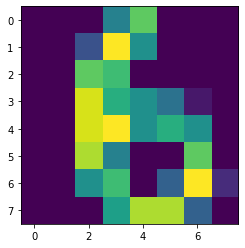

Model's prediction: 6



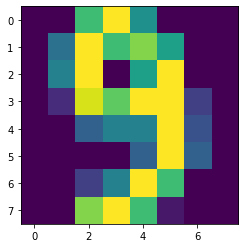

Model's prediction: 9



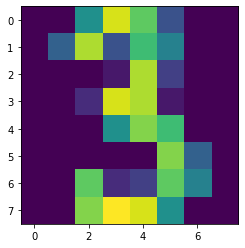

Model's prediction: 3



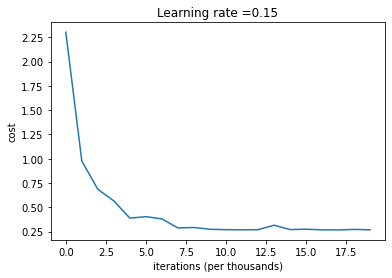

In [184]:
# Running the Model (all parameters are global so nothing to pass)
ff__nn()

# test_input = np.array(
#     [[1,1,1],
#      [1,0,0],
#      [0,0,1],
#      [0,0,0],
#      [0,1,0],
#      [0,5,6],
#      [1,2,2],
#      [1,3,1]
#      ])

test_input = X_test.T
predict(test_input, True)
# print(y_test.T)
# print(y_test.shape)

# print(X_train.shape)

plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()


### Tuning learning_rate

(64, 1203)
(10, 1203)
L:  4
Cost after 0 iterations: 2.3025787463483374
Cost after 1000 iterations: 0.6248490627929091
Cost after 2000 iterations: 0.4232110426805798
Cost after 3000 iterations: 0.2817772861487821
Cost after 4000 iterations: 0.13959842191026242
Cost after 5000 iterations: 0.12235909253582188
Cost after 6000 iterations: 0.11887291027581952
Cost after 7000 iterations: 0.11490151982894883
Cost after 8000 iterations: 0.1093498074548812
Cost after 9000 iterations: 0.10910046545307742


Accuracy : 91.24579124579125% 




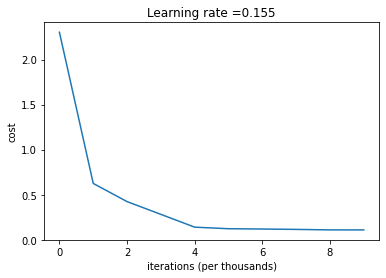

In [186]:
# training_inputs = np.array(
#     [[1,1,0],
#      [1,0,1],
#      [0,1,1],
#      [0,1,0]])


# training_inputs = training_inputs.T
training_inputs  = X_train.T

print(training_inputs.shape)
# training_outputs = np.array([[0,0,1,1],[1,1,0,0],[0,0,0,0]])
training_outputs = onehot_encoded.T

print(training_outputs.shape)

# Training input shape = (n_x, m) n_x=3 , m=4   => (3,4)
# Training outputs shape = (n_y, m)    

# DEFINING PARAMTERS weights and bais and n_x, n_h, n_y

X = training_inputs
Y = training_outputs

n_x, n_y = X.shape[0], Y.shape[0]   
m = X.shape[1]

layer_dims = [n_x, 5, 4, n_y]
L = len(layer_dims) # It does not represents L as its value is L+1 where L is L- deep nn
print('L: ',L)
# n_h = L-1

# Hyperparameters for Learning Decay 
learning_rate = 0.155 
lr0 = 1
decay_rate = 1

num_iterations = 10000

# weights matrix 
# shape (n_h, n_x)
# W1 = np.random.rand(n_h, n_x) * 0.01
# b1 = np.zeros(shape=(n_h, 1)) 
# W2 = np.random.rand(n_y, n_h) * 0.01
# b2 = np.zeros(shape=(n_y, 1)) 

parameters = {}

for l in range(1,L):
  parameters["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
  parameters["b"+str(l)] = np.zeros(shape=(layer_dims[l],1))

# print('parameters:\n',parameters)

costs = [] # We will use this List to plot cost fn

ff__nn()

predict(X_test.T)

plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()



### From 83% accuracy to 91.2%, just by changing num_iterations and a minute 0.05 change in learning_rate, so earlier our model was overfitting and that's why not being able to generalize properly. 